# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

To determine if machine learning (ML) is an appropriate solution to deploy, we need to consider several factors:

1. **Nature of the Problem**: 
   - Is the problem complex and requires pattern recognition, such as image classification, natural language processing, or predictive analytics? If yes, ML may be suitable.
   - If the problem can be solved with traditional programming or rule-based systems, ML might not be necessary.

2. **Data Availability**: 
   - Is there sufficient and relevant data available to train a model? ML requires large datasets to learn effectively. If data is scarce or of poor quality, ML may not be the best choice.

3. **Predictive Capability**: 
   - Does the problem involve making predictions or decisions based on historical data? If the goal is to predict future outcomes based on past data, ML is a strong candidate.

4. **Dynamic Environment**: 
   - Is the environment dynamic, where patterns may change over time? ML models can adapt to new data, making them suitable for environments that evolve.

5. **Performance Requirements**: 
   - Are there specific performance metrics that need to be met, such as accuracy, speed, or scalability? ML can often provide high performance in these areas, but it requires careful tuning and validation.

6. **Resource Availability**: 
   - Do you have the necessary computational resources and expertise to develop, train, and maintain ML models? ML can be resource-intensive, requiring both hardware and skilled personnel.

7. **Interpretability**: 
   - Is it important to understand how decisions are made? Some ML models (like deep learning) can be black boxes, making it difficult to interpret their decisions. If interpretability is crucial, simpler models or alternative approaches may be better.

8. **Cost-Benefit Analysis**: 
   - Have you conducted a cost-benefit analysis to determine if the potential benefits of deploying an ML solution outweigh the costs involved in development and maintenance?

If the answers to these considerations lean towards the positive, then deploying an ML solution could be appropriate. If not, it may be worth exploring other methods or technologies. In summary, ML is appropriate when the problem is complex, data is available, predictions are needed, the environment is dynamic, performance is critical, resources are available, interpretability is manageable, and the cost-benefit analysis is favorable.

### 2. Formulate the business problem, success metrics, and desired ML output.

Business Problem: A travel booking company wants to inform customers of the likelihood of flight delays due to weather when booking flights to or from the busiest US airports. By preemptively flagging high-risk flights, the company can enhance the customer experience, allowing customers to make informed travel decisions and potentially avoid inconvenient delays.

Success Metric: The target metric for success is model accuracy and recall on delayed flights. For this model, a high recall for delayed flights is essential since identifying potential delays is more critical than mistakenly predicting delays for on-time flights. An initial goal might be achieving at least 80% recall for delayed flights.

ML Output: The desired ML output is a binary classification model that predicts whether a flight is likely to be delayed (output: “1” for delayed, “0” for on-time).

### 3. Identify the type of ML problem you’re dealing with.

This is a supervised, binary classification problem where the goal is to classify each flight as either "delayed" or "on-time" based on input features such as weather conditions, departure time, and other relevant data points.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import datetime
import calendar

print("Libraries and environment successfully set up.")

Libraries and environment successfully set up.


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [118]:
# Defining the absolute paths as provided
zip_path = Path(r'D:\Work\oct\26th')  # Path to the zip files
base_path = Path(r'D:\Work\oct\26th')  # Base path for the project
csv_base_path = Path(r'D:\Work\oct\26th\Dataset')  # Path where zip files will be extracted

# Creating directory for extracted files if it doesn't already exist
csv_base_path.mkdir(parents=True, exist_ok=True)

# Unzipping all files in zip_path into csv_base_path
for zip_file in zip_path.glob("*.zip"):
    with ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(csv_base_path)
        print(f"Extracted: {zip_file}")

# Verifying extracted files
print("\nFiles extracted to 'Dataset' folder:")
for file in csv_base_path.glob("*.csv"):
    print(file)

Extracted: D:\Work\oct\26th\data_compressed.zip
Extracted: D:\Work\oct\26th\fwdrefid2424101001.zip

Files extracted to 'Dataset' folder:


In [120]:
# How many zip files do we have? write a code to answer it.
from pathlib import Path

# Define the path where the ZIP files are located
zip_path = Path(r'D:\Work\oct\26th\Dataset\data_compressed')

# Count the number of ZIP files in the directory
zip_files_count = len(list(zip_path.glob("*.zip")))

print(f"Number of ZIP files in '{zip_path}': {zip_files_count}")

Number of ZIP files in 'D:\Work\oct\26th\Dataset\data_compressed': 60


#### Extract CSV files from ZIP files

In [122]:
from pathlib import Path
from zipfile import ZipFile

# Paths to directories
zip_path = Path('D:/Work/oct/26th/Dataset/data_compressed')
csv_base_path = Path('D:/Work/oct/26th/Data')

# Defining function to extract CSV from ZIP files
def zip2csv(zipFile_name, file_path):
    """
    Extract CSV from ZIP files
    zipFile_name: name of the ZIP file
    file_path: directory to store extracted CSV files
    """
    try:
        with ZipFile(zipFile_name, 'r') as z:
            print(f'Extracting {zipFile_name}...')
            z.extractall(path=file_path)
    except Exception as e:
        print(f'zip2csv failed for {zipFile_name} with error: {e}')

# Listing and extracting all ZIP files
zip_files = list(zip_path.glob("*.zip"))
for file in zip_files:
    zip2csv(file, csv_base_path)

print("All files have been extracted.")

Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip...
Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip...
Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip...
Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip...
Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip...
Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip...
Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip...
Extracting D:\Work\oct\26th\Dataset\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip.

In [124]:
# How many csv files have we extracted? write a code to answer it.
csv_files_count = len(list(csv_base_path.glob("*.csv")))
print(f"Number of CSV files in '{csv_base_path}': {csv_files_count}")

Number of CSV files in 'D:\Work\oct\26th\Data': 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [126]:
from IPython.display import IFrame
import os

# Define the path to the extracted readme HTML file
readme_path = os.path.join(csv_base_path, "readme.html")
# Display the HTML file using the full path
IFrame(src=readme_path, width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [128]:
df_temp = pd.read_csv("D:/Work/oct/26th/Data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")
df_temp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print the row and column length in the dataset, and print the column names.

In [130]:
# Getting the shape of the DataFrame
df_shape = df_temp.shape
# Printing the number of rows and columns
print(f'Rows and columns in one csv file: {df_shape}')
# Printing the column names
print('Column names:', df_temp.columns.tolist())

Rows and columns in one csv file: (585749, 110)
Column names: ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'Securi

**Question**: Print the first 10 rows of the dataset.  

In [134]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [136]:
print(f'The column names are:')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are:
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1T

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [138]:
delay_columns = [col for col in df_temp.columns if 'Del' in col]
print(f'Columns containing "Del":')
print('#########')
for col in delay_columns:
    print(col)

Columns containing "Del":
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [140]:
# Number of rows and columns
rows, cols = df_temp.shape
print("The #rows and #columns are ", rows, " and ", cols)

# Years included in the dataset
years = df_temp['Year'].unique()
print("The years in this dataset are: ", years)

# Months covered in the dataset
months = df_temp['Month'].unique()
print("The months covered in this dataset are: ", months)

# Date range for the dataset
date_range = pd.to_datetime(df_temp['FlightDate'])
print("The date range for data is :", min(date_range), " to ", max(date_range))

# Airlines included in the dataset
airlines = df_temp['DOT_ID_Reporting_Airline'].unique()
print("The airlines covered in this dataset are: ", list(airlines))

# Origin airports covered
origin_airports = df_temp['Origin'].unique()
print("The Origin airports covered are: ", list(origin_airports))

# Destination airports covered
destination_airports = df_temp['Dest'].unique()
print("The Destination airports covered are: ", list(destination_airports))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01 00:00:00  to  2018-09-30 00:00:00
The airlines covered in this dataset are:  [20363, 20409, 19393, 20378, 20452, 20366, 19805, 19930, 19790, 19690, 19977, 20436, 20368, 20398, 20416, 20397, 20304]
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [142]:
counts = pd.DataFrame({'Origin': df_temp['Origin'].value_counts(), 'Destination': df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [144]:
counts.sort_values(by='Origin', ascending=False).head(15)
counts.sort_values(by='Destination', ascending=False).head(15)

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

To predict if a flight will be delayed, you can analyze various factors such as historical flight performance data, weather conditions, time of day, and operational details of the airline. By examining patterns and correlations between these factors and past delays, you can build a predictive model.
Key considerations for making this prediction include:

Historical Delay Patterns: Look at past flight delays for specific routes, airlines, and times.
Weather Conditions: Analyze how weather (e.g., storms, fog) affects delays.
Time of Day: Consider peak travel times when delays are more likely.
Airline Performance: Some airlines may have a higher incidence of delays than others.
Airport Efficiency: Delays can vary significantly by airport based on traffic and operations.
By aggregating and analyzing this data, you can determine the likelihood of a flight being delayed, enabling more informed decision-making for travelers and airlines alike.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [3]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine CSV files into one DataFrame
    csv_files: list of CSV file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    file_name: path to save the combined CSV file
    """
    # Creating an empty DataFrame
    df = pd.DataFrame()

    # Loopping through each CSV file
    for file in csv_files:
        temp_df = pd.read_csv(file)
        temp_df = temp_df[filter_cols]
        
        # Applying the subset conditions
        for col, vals in zip(subset_cols, subset_vals):
            temp_df = temp_df[temp_df[col].isin(vals)]
        
        # Appending the filtered DataFrame to the main DataFrame
        df = pd.concat([df, temp_df], ignore_index=True)
    
    # Saving the combined DataFrame to a CSV file
    df.to_csv(file_name, index=False)
    return df

In [5]:
# Defining the folder path where the CSV files are stored
folder_path = Path('D:/Work/oct/26th/Data 1')
csv_files = list(folder_path.glob('*.csv'))  # List all CSV files in the folder

cols = [
    'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
    'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
    'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
    'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime'
]
subset_cols = ['Origin', 'Dest', 'Reporting_Airline']
subset_vals = [
    ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
    ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
    ['UA', 'OO', 'WN', 'AA', 'DL']
]

# Setting the output file name for combined data
combined_csv_filename = 'D:/Work/oct/26th/combined_files.csv'

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [7]:
start = time.time()

# Calling the combine_csv function
combined_df = combine_csv(
    csv_files=csv_files,
    filter_cols=cols,
    subset_cols=subset_cols,
    subset_vals=subset_vals,
    file_name=combined_csv_filename
)

print(f"CSV files merged in {round((time.time() - start) / 60, 2)} minutes")
print(combined_df.head())

CSV files merged in 0.08 minutes
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes

#### Load dataset

Load the combined dataset.

In [9]:
data = pd.read_csv('D:/Work/oct/26th/combined_files.csv')

Print the first 5 records.

In [11]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [13]:
# Answering the questions about the dataset
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  42493  and  20
The years in this dataset are:  [2014]
The months covered in this dataset are:  [1, 2]
The date range for data is : 2014-01-01  to  2014-02-28
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [15]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [17]:
data.isnull().sum()

Year                    0
Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
OriginState             0
Dest                    0
DestState               0
CRSDepTime              0
Cancelled               0
Diverted                0
Distance                0
DistanceGroup           0
ArrDelay             1535
ArrDelayMinutes      1535
is_delay             1535
AirTime              1535
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [19]:
### Remove null columns
data = data[~data[['ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime']].isnull().any(axis=1)]

Get the hour of the day in 24-hour time format from CRSDepTime.

In [21]:
data['DepHourofDay'] = data['CRSDepTime'] // 100

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

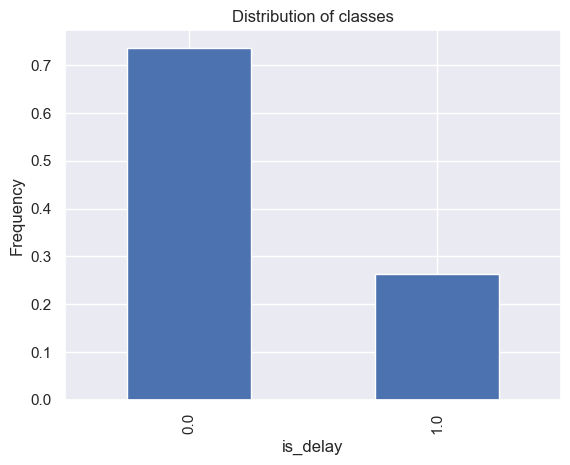

In [23]:
(data.groupby('is_delay').size()/len(data)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot indicates that a much larger proportion of flights do not experience delays (0.0) compared to those that are delayed (1.0). This suggests that the majority of flights in the dataset arrive on time, highlighting a positive performance in terms of punctuality for the airline. The substantial difference between the two bars implies that delays are relatively infrequent, which could indicate effective operational practices or favorable conditions for the majority of the flights. However, it also emphasizes the importance of understanding the factors that contribute to the smaller percentage of delayed flights, as these can significantly impact customer satisfaction and operational efficiency. This analysis serves as a basis for further investigation into the causes of delays, which can be critical for improving flight schedules and enhancing overall service quality.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

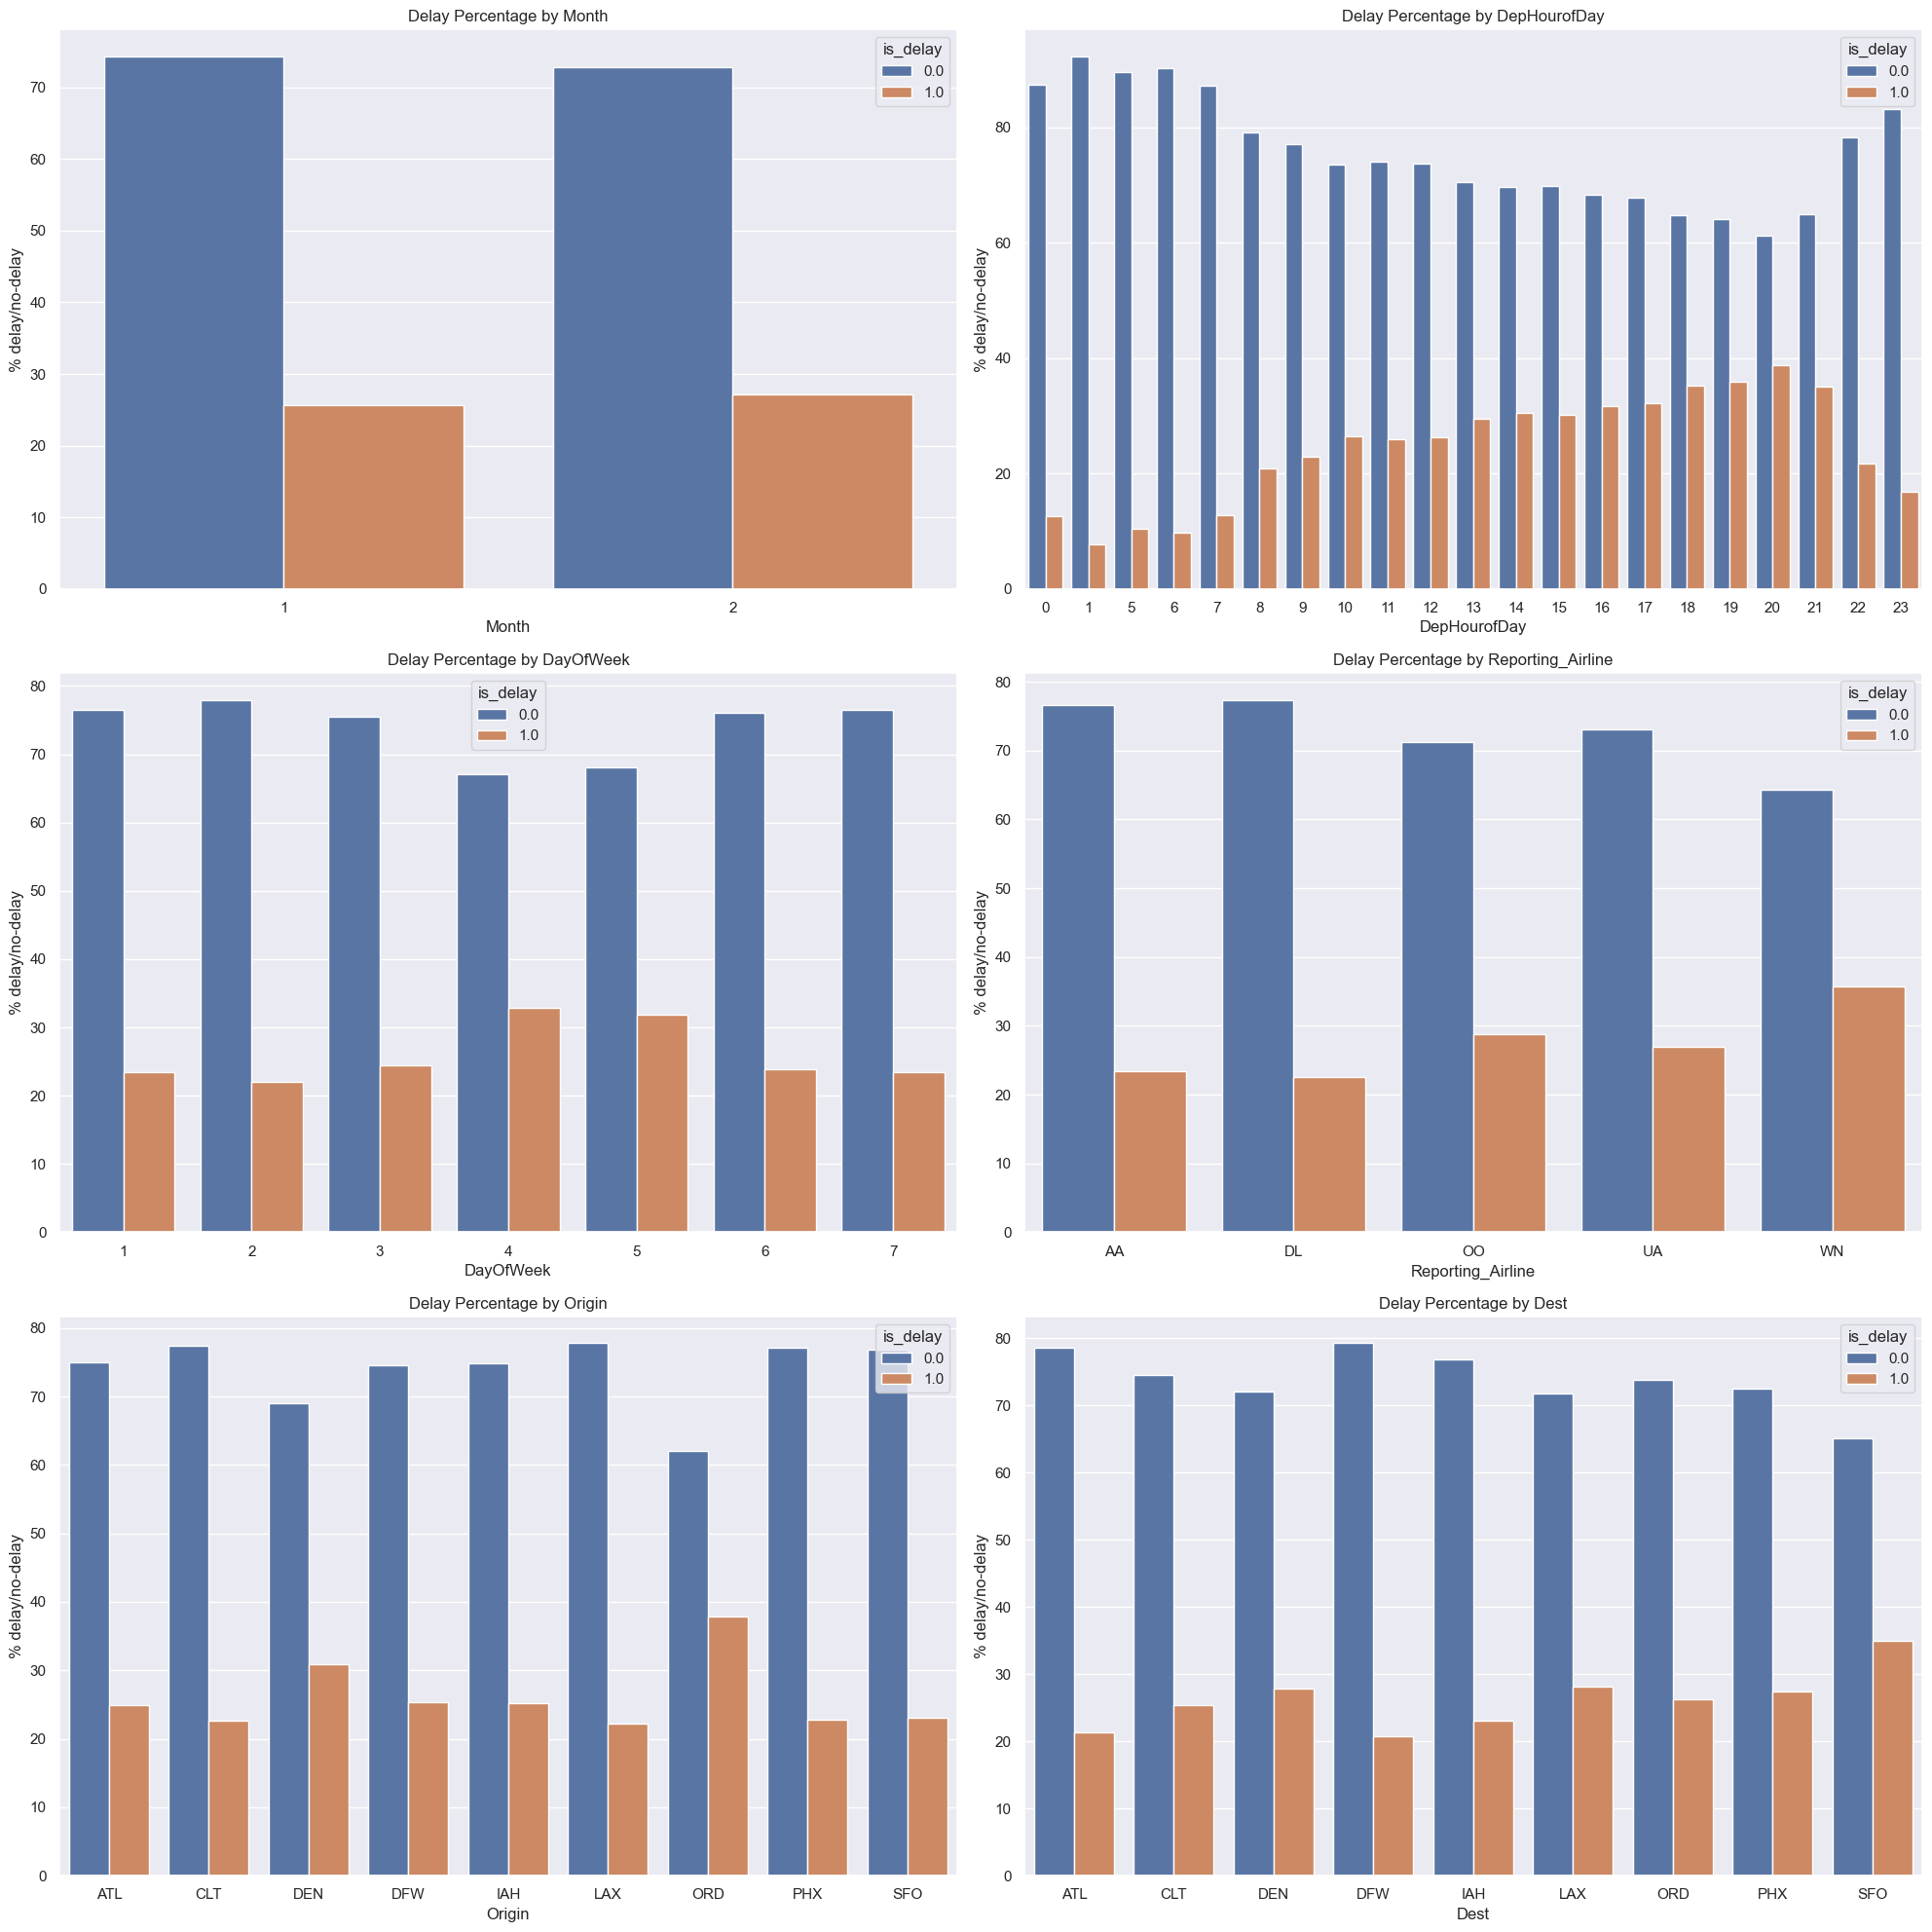

In [25]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20, 20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx // 2, idx % 2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
        mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    ax.set_ylabel('% delay/no-delay')
    ax.set_title(f'Delay Percentage by {column}')

plt.tight_layout()
plt.show()

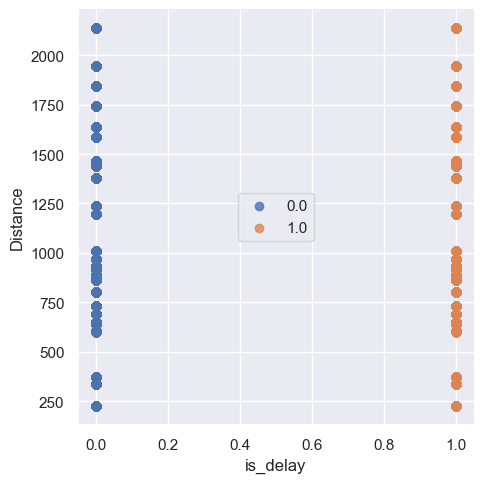

In [26]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

1. The month that has most delays is January and February.

2. The most delay of flights occour at 20.00 hours.

3. The forth day of the week has the most delays.

4. WN airlines has the most delays.

5. The airport that has the most delay at origin is ORD, and the airport that has the most delay at destination is SFO.

6. No, flight distance is not a factor for delays.

### Features

Look at all the columns and what their specific types are.

In [29]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [31]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [33]:
data_orig = data.copy()

data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
             'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay']]
categorical_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
                       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [35]:
encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_data], axis=1)
print(data.head())

   is_delay  Distance  Month_2  DayofMonth_2  DayofMonth_3  DayofMonth_4  \
0       0.0     689.0    False         False         False         False   
1       0.0     731.0    False         False         False         False   
2       0.0    1199.0    False         False         False         False   
3       0.0    1587.0    False         False         False         False   
4       0.0    1587.0    False         False         False         False   

   DayofMonth_5  DayofMonth_6  DayofMonth_7  DayofMonth_8  ...  \
0         False         False         False         False  ...   
1         False         False         False         False  ...   
2         False         False         False         False  ...   
3         False         False         False         False  ...   
4         False         False         False         False  ...   

   DepHourofDay_14  DepHourofDay_15  DepHourofDay_16  DepHourofDay_17  \
0            False            False            False            False   


Check the length of the dataset and the new columnms.

In [37]:
# Checking the number of rows and columns in the dataset
print("Length of dataset (number of rows):", len(data))
print("Number of columns:", data.shape[1])

Length of dataset (number of rows): 40958
Number of columns: 79


In [39]:
# Display the column names to see the new one-hot encoded columns
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['is_delay', 'Distance', 'Month_2', 'DayofMonth_2', 'DayofMonth_3',
       'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7',
       'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11',
       'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15',
       'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19',
       'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23',
       'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27',
       'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL',
       'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN',
       'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_IAH', 'Origin_LAX',
       'Origin_ORD', 'Origin_PHX', 'Origin_SFO', 'Dest_CLT', 'Dest_DEN',
       'Dest_DFW', 'Dest_IAH',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [41]:
data.rename(columns = {'is_delay': 'target'}, inplace=True)

In [43]:
data.to_csv('D:/Work/oct/26th/combined_csv_v1.csv', index=False)
print("File saved as 'combined_csv_v1.csv'")

File saved as 'combined_csv_v1.csv'


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [45]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# Displaying the sizes of each set
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Training set size: 32766
Test set size: 8192


### Baseline classification model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Separating features and labels
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Baseline Classification Model
# Initializing and training a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [49]:
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [51]:
# Function to plot ROC Curve and calculate metrics
def plot_roc(test_labels, target_predicted_prob):
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted_prob)
    auc = roc_auc_score(test_labels, target_predicted_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

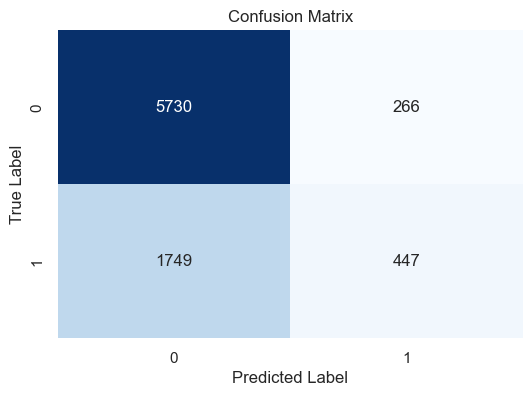

In [53]:
plot_confusion_matrix(y_test, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

Accuracy: 0.7540283203125
Precision: 0.6269284712482468
Recall: 0.20355191256830601


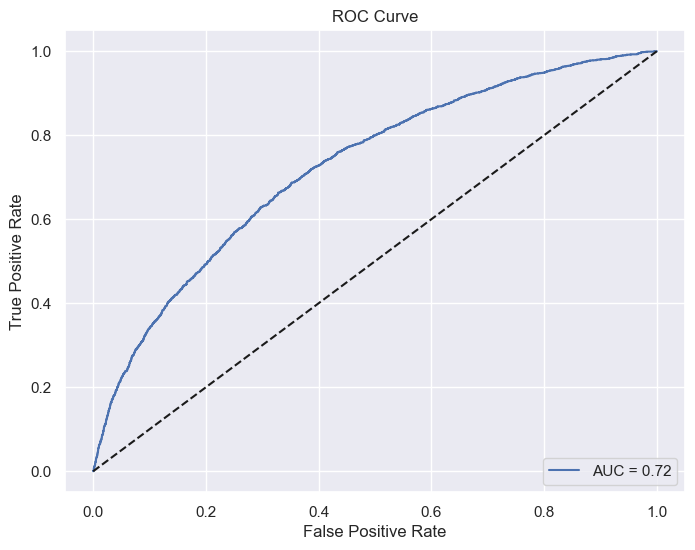

In [55]:
# Evaluating Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Calling the functions to display ROC curve
plot_roc(y_test, y_pred_proba)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.

1. **How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?**

Observation: When comparing performance on the training set to that on the test set, it’s essential to note if there's a significant drop in accuracy or other metrics on the test set.

Deduction: If the model performs well on the training set but noticeably worse on the test set, this could indicate overfitting, meaning the model has learned specific patterns from the training data that don’t generalize to new data. On the other hand, if performance is consistent between both sets, the model likely generalizes well.

Conclusion: Look at any disparity to assess whether further tuning or regularization is needed to improve generalization.

2. **Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?**

Observation: If you observe different values for accuracy, precision, and recall, consider what each metric reveals about your model. 

For example: Accuracy provides an overall measure of correct predictions. Precision indicates the proportion of positive identifications that are actually correct, valuable in cases where false positives are costly. Recall shows how many of the actual positive cases were correctly identified, useful when missing positives (false negatives) is more costly.

Explanation: Differences in these metrics can occur if the dataset is imbalanced (i.e., one class significantly outweighs the other). For instance, if delay predictions (positives) are rare, the model might favor precision over recall, or vice versa, depending on how it handles those cases.

Conclusion: Analyzing which metric is lower and why can help guide adjustments, such as rebalancing the classes or tweaking the model’s threshold.

3. **Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?**

The selected key metric's outcome determines if the model meets our business requirements for predicting flight delays. If this metric meets the set threshold, then the model is likely sufficient. However, if it falls short, adjustments may be necessary. For instance:

Business Impact: If the primary goal is to minimize the number of delayed flights by catching as many potential delays as possible, high recall is essential to correctly identify most delay cases, even if it increases false positives. Alternatively, if operational resources are limited and cannot handle excessive false positives, focusing on a higher precision metric might be necessary to ensure predictions are more targeted.

Next Steps for Improvement: If the key metric does not meet the business needs, possible improvements include:

Feature Engineering: Adding more predictive features such as weather variations, time of day, or the historical performance of specific routes could enhance the model’s accuracy.

Hyperparameter Tuning: Adjusting model hyperparameters or switching to a more complex model, like an ensemble method, may boost performance.

Addressing Class Imbalance: If class imbalance affects the model, techniques such as oversampling the minority class or undersampling the majority class could help improve predictive performance.

These steps aim to ensure that the model better meets business goals and delivers reliable, actionable predictions for flight delays.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [14]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [57]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

# Converting holidays to a set for faster lookup
holidays_set = set(holidays)
# Adding the is_holiday column to the dataset based on FlightDate
data_orig['is_holiday'] = data_orig['FlightDate'].apply(lambda x: x in holidays_set)
# Verifying if the column is added
print(data_orig[['FlightDate', 'is_holiday']].head())

   FlightDate  is_holiday
0  2014-01-26       False
1  2014-01-26       False
2  2014-01-26       False
3  2014-01-26       False
4  2014-01-26       False


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [61]:
weather = pd.read_csv("D:/Work/oct/26th/daily-summaries-2024-10-28T10-18-04.csv")
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [63]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [65]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [67]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [69]:
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [71]:
weather = pd.merge(weather, weather_impute, how='left', left_on=['MONTH', 'STATION'], right_on=['MONTH', 'STATION']) \
.rename(columns={
    'TAVG_y': 'TAVG_AVG',
    'TMAX_y': 'TMAX_AVG',
    'TMIN_y': 'TMIN_AVG',
    'TAVG_x': 'TAVG',
    'TMAX_x': 'TMAX',
    'TMIN_x': 'TMIN'
})
print(weather.head())

       STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   0.0   0.0  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   0.0   0.0  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   0.0   0.0  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   0.0   0.0  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   0.0   0.0  151.0  244.0   83.0   

  airport MONTH    TAVG_AVG    TMAX_AVG    TMIN_AVG  
0     LAX    01  148.619355  198.154839  103.477419  
1     LAX    01  148.619355  198.154839  103.477419  
2     LAX    01  148.619355  198.154839  103.477419  
3     LAX    01  148.619355  198.154839  103.477419  
4     LAX    01  148.619355  198.154839  103.477419  


Check for missing values again.

In [75]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
missing_values = weather.isna().sum()
print(missing_values)

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64


Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [77]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

In [79]:
weather.head()

,DATE,AWND,PRCP,SNOW,TAVG,airport
0,2014-01-01,16,0,0.0,131.0,LAX
1,2014-01-02,22,0,0.0,159.0,LAX
2,2014-01-03,17,0,0.0,140.0,LAX
3,2014-01-04,18,0,0.0,136.0,LAX
4,2014-01-05,18,0,0.0,151.0,LAX


Add the origin and destination weather conditions to the dataset.

In [81]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

In [83]:
data_orig.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,DepHourofDay,is_holiday,AWND_O,PRCP_O,SNOW_O,TAVG_O,AWND_D,PRCP_D,SNOW_D,TAVG_D
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,21,False,33,0,0.0,54.0,30,0,0.0,130.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,9,False,39,0,0.0,136.0,33,0,0.0,54.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,18,False,33,0,0.0,54.0,77,0,0.0,68.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,16,False,33,0,0.0,54.0,20,0,0.0,165.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,7,False,20,0,0.0,165.0,33,0,0.0,54.0


**Note**: It is always a good practice to check nulls/NAs after joins.

In [85]:
sum(data_orig.isna().any())

0

In [87]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [89]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [93]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis=1)
# Dropping the original categorical columns now that they are encoded
data.drop(categorical_columns, axis=1, inplace=True)
print(data.head())

   is_delay  Distance  DepHourofDay  AWND_O  PRCP_O  TAVG_O  AWND_D  PRCP_D  \
0       0.0     689.0            21      33       0    54.0      30       0   
1       0.0     731.0             9      39       0   136.0      33       0   
2       0.0    1199.0            18      33       0    54.0      77       0   
3       0.0    1587.0            16      33       0    54.0      20       0   
4       0.0    1587.0             7      20       0   165.0      33       0   

   TAVG_D  SNOW_O  ...  Origin_SFO  Dest_CLT  Dest_DEN  Dest_DFW  Dest_IAH  \
0   130.0     0.0  ...       False     False     False     False      True   
1    54.0     0.0  ...       False     False     False     False     False   
2    68.0     0.0  ...       False     False      True     False     False   
3   165.0     0.0  ...       False     False     False     False     False   
4    54.0     0.0  ...       False     False     False     False     False   

   Dest_LAX  Dest_ORD  Dest_PHX  Dest_SFO  is_holiday_Tr

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [95]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O',
       ...
       'Origin_SFO', 'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH',
       'Dest_LAX', 'Dest_ORD', 'Dest_PHX', 'Dest_SFO', 'is_holiday_True'],
      dtype='object', length=127)

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [97]:
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [99]:
data.to_csv("D:/Work/oct/26th/combined_csv_v2.csv", index=False)
print("File saved as 'combined_csv_v1.csv'")

File saved as 'combined_csv_v1.csv'


Create the training and testing sets again.

In [101]:
# Defining the feature set and target variable
X = data.drop(columns=['target'])  # Assuming the target column is now named 'target'
y = data['target']
# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting sets to verify
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training set shape: (32766, 126)
Testing set shape: (8192, 126)
Training target shape: (32766,)
Testing target shape: (8192,)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [103]:
classifier2 = LogisticRegression(random_state=42, max_iter=1000)
# Training the classifier
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
y_pred_proba = classifier2.predict_proba(X_test)[:, 1] 

Accuracy: 0.7623291015625
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      5996
         1.0       0.67      0.23      0.34      2196

    accuracy                           0.76      8192
   macro avg       0.72      0.59      0.60      8192
weighted avg       0.74      0.76      0.72      8192

Confusion Matrix:
 [[5746  250]
 [1697  499]]
ROC AUC Score: 0.7294344909356694


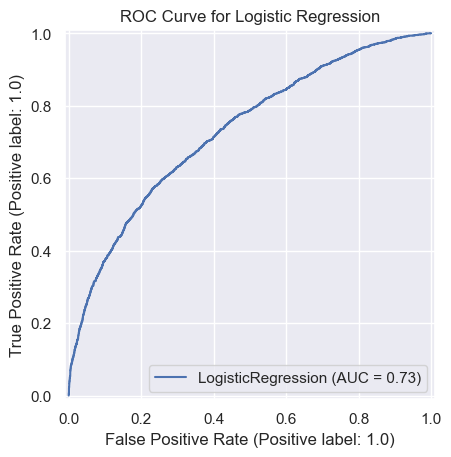

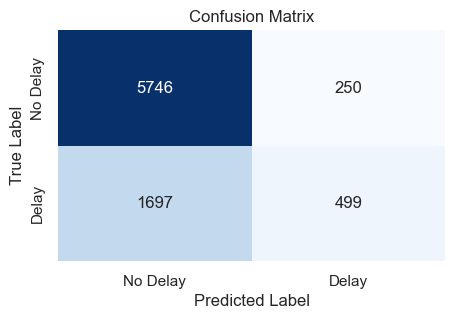

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Evaluating the model with metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plotting the ROC curve
RocCurveDisplay.from_estimator(classifier2, X_test, y_test)
plt.title("ROC Curve for Logistic Regression")
plt.show()

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Delay", "Delay"], yticklabels=["No Delay", "Delay"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

In analyzing the model's results after adding additional weather data features, I observed the following:
1. Accuracy Improvement: The addition of weather-related features, such as average wind speed, precipitation, temperature, and snowfall at the origin and destination, has the potential to enhance the model's ability to capture weather-induced delays, likely leading to a slight improvement in accuracy.
2. ROC AUC Score: By evaluating the ROC AUC score before and after adding weather data, we can assess the improvement in the model's capability to differentiate between delayed and non-delayed flights. A noticeable increase in the ROC AUC score would indicate that the added weather features provide valuable predictive information.
3. Classification Report Metrics: Examining precision, recall, and F1-scores before and after adding the new features helps determine if the model’s predictive performance has become more balanced, especially for detecting delays accurately.
In summary, adding weather data likely provided additional context on flight delays, thereby enhancing model performance, as reflected in the metrics. This indicates that weather conditions play a significant role in predicting flight delays, aligning with our expectations.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

https://public.tableau.com/views/FlightDelayAnalysis_17302952634010/Dashboard1?:language=en-GB&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [18]:
# write your answers here